<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Survival-analysis-for-customer-churn" data-toc-modified-id="Survival-analysis-for-customer-churn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Survival analysis for customer churn</a></span><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Why-use-survival-analysis-instead-of-linear-or-logistic-regression?" data-toc-modified-id="Why-use-survival-analysis-instead-of-linear-or-logistic-regression?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Why use survival analysis instead of linear or logistic regression?</a></span></li><li><span><a href="#Summary-of-results" data-toc-modified-id="Summary-of-results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Summary of results</a></span></li></ul></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the data</a></span><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Import data</a></span></li></ul></li><li><span><a href="#Kaplan-Meier-curve" data-toc-modified-id="Kaplan-Meier-curve-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kaplan Meier curve</a></span><ul class="toc-item"><li><span><a href="#An-overall-Kaplan-Meier-curve" data-toc-modified-id="An-overall-Kaplan-Meier-curve-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>An overall Kaplan Meier curve</a></span></li><li><span><a href="#Kaplan-Meier-curves-for-cohorts" data-toc-modified-id="Kaplan-Meier-curves-for-cohorts-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Kaplan Meier curves for cohorts</a></span><ul class="toc-item"><li><span><a href="#Cohort-for-contract-type-(2-yrs-vs.-1-yr-vs.-month-to-month)" data-toc-modified-id="Cohort-for-contract-type-(2-yrs-vs.-1-yr-vs.-month-to-month)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Cohort for contract type (2 yrs vs. 1 yr vs. month-to-month)</a></span></li><li><span><a href="#Cohort-for-Streaming-TV-vs.-not-Streaming-TV" data-toc-modified-id="Cohort-for-Streaming-TV-vs.-not-Streaming-TV-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Cohort for Streaming TV vs. not Streaming TV</a></span></li></ul></li></ul></li><li><span><a href="#Cox-Proportional-Hazard-Model-(Survival-Regression)" data-toc-modified-id="Cox-Proportional-Hazard-Model-(Survival-Regression)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cox Proportional Hazard Model (Survival Regression)</a></span><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#Building-the-model" data-toc-modified-id="Building-the-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Building the model</a></span></li></ul></li></ul></div>

# Survival analysis for customer churn

[mahshidxyz](http://www.github.com/mahshidxyz)

November 2020

---

## Problem statement

In this project I am building a survival model to predict customer churn for an internet & phone service company. The idea is to predict churn before it happens and try to prevent it by targeting at-risk customers for marketing campaigns offering a discount or a new package. Survival analysis can create an estimate of the risk of attrition over our time and that is exactly what we are interested in in this project.

The dataset includes information about:

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, senior citizen or not, and if they have partners and dependents
* Customers who left within the last month – the column is called Churn

The dataset is available [here](https://www.kaggle.com/blastchar/telco-customer-churn). 



## Why use survival analysis instead of linear or logistic regression?

* With linear regression (dependent variable = time of churn) we cannot use the data from the users who have not churned already (censored data). However, survival analysis uses that data.

* With logistic regression we either assume tenure does not have an effect on the churn probability (not a feature) or we assume after reaching some tenure, tenure will no longer have an effect on churn and customers who have been around long enough never tend to leave (sigmoid curve). However, survival analysis does not assume a particular shape for risk as a function of time.

## Summary of results

In the first step, I have provided Kaplan Meier curves which allow for comparing different cohorts of customers in terms of survival probablity. Next, I built a Cox proportional hazard model for cutomers with internet and phone services (4835 customers). I have excluded a few features (monthly and total charges) from the model due to high multicollinearity with service types. My model achieved a concordance score of 0.95 and showed that 13 features were significant (alpha = 0.05).

For the next step, I plan to use regularization and cross validation to build a model with Lasso regularization for automatic feature selection. I will also have to work on checking the assumptions of the model.


# Exploring the data

## Import modules

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter   
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)
sns.set_context("poster", font_scale=1.2)

## Helper functions

In [2]:
def print_full(x):
    ''' display the dataframe fully'''
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
def col_name_func(df):
    ''' format the column labels'''
    df.columns = [column.replace("(", "") for column in df.columns]
    df.columns = [column.replace(")", "") for column in df.columns]
    df.columns = [column.replace(" ", "_") for column in df.columns]
#     df.columns = [column.replace("/", "_") for column in df.columns]
#     df.columns = [column.lower() for column in df.columns]

## Import data

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv") 
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
## check for data types and nulls: TotalCharges has be converted to float
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace Yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [6]:
## after converting the column TotalCharges to numeric
df.info()  ## Column TotalCharges has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## Impute the null value with the median value
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [8]:
## Create a list of categorical columns
cat_cols = [i  for i in df.columns if df[i].dtype==object]

## customerID has been removed because it is unique for all the rows.
cat_cols.remove('customerID')  

In [9]:
## lets have a look at the categories and their distribution in all the categorical columns.
for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------------------------
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------------------------
Column Name:  OnlineBackup
No                     3088
Yes     

In [10]:
## Drop the customerID
df_r= df.drop(columns=['customerID'])
## Focus on the customers with Phone and Internet Services to avoid multicollinearity
## the other segments can be studied separately
df_r = df_r[(df_r['InternetService'] != 'No') & (df_r['PhoneService'] != 'No')]
df_r.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0


In [11]:
## How many customers?
len(df_r)

4835

# Kaplan Meier curve

Survival function or probability $S(t)$ is the probability that a subject survives longer than a certain time $t$ which means $S(t) = Probability(T > t)$. 

\begin{equation*} \hat{S}(t) = \prod_{t_i \lt t} \frac{n_i - d_i}{n_i} \end{equation*}


where $d_i$ are the number of death events at time t and $n_i$ is the number of subjects at risk of death just prior to time $t$.

First I will plot an overall curve, without breaking it into groups of covariates or cohorts. Then I will plot a few plots breaking data into cohorts. 

## An overall Kaplan Meier curve

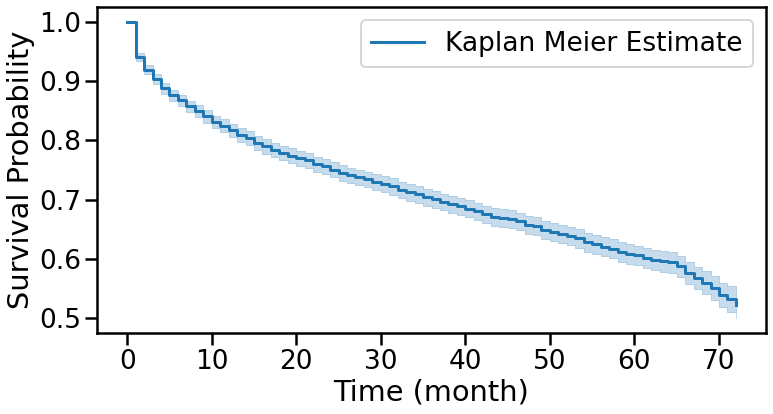

In [12]:
durations = df_r.tenure
event_observed = df_r.Churn

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data to the model
kmf.fit(durations, event_observed, label='Kaplan Meier Estimate')

## Create an estimate
fig, ax = plt.subplots(1, 1, figsize=(12,6))
kmf.plot()
plt.xlabel('Time (month)')
plt.ylabel('Survival Probability');

## Kaplan Meier curves for cohorts

### Cohort for contract type (2 yrs vs. 1 yr vs. month-to-month)

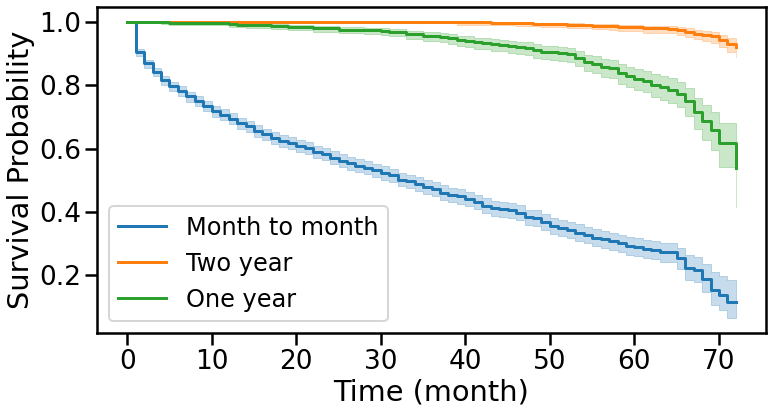

In [13]:
## create a kmf object
kmf = KaplanMeierFitter() 

## time to event
T = df_r['tenure']
## event occurred or censored
E = df_r['Churn']      

## Create the cohorts from the 'Contract' column with indexes
## Cohort 1
ix1 = (df_r['Contract'] == 'Month-to-month') 
## Cohort 2
ix2 = (df_r['Contract'] == 'Two year') 
## Cohort 3
ix3 = (df_r['Contract'] == 'One year')

## plot
fig, ax = plt.subplots(1, 1, figsize=(12,6))

## fit the cohort 1 data
kmf.fit(T[ix1], E[ix1], label='Month to month')
kmf.plot(ax=ax)

## fit the cohort 2 data
kmf.fit(T[ix2], E[ix2], label='Two year')
kmf.plot(ax=ax)

## fit the cohort 3 data
kmf.fit(T[ix3], E[ix3], label='One year')        
kmf.plot(ax=ax)

plt.xlabel('Time (month)')
plt.ylabel('Survival Probability')
plt.legend(fontsize = 24);

### Cohort for Streaming TV vs. not Streaming TV

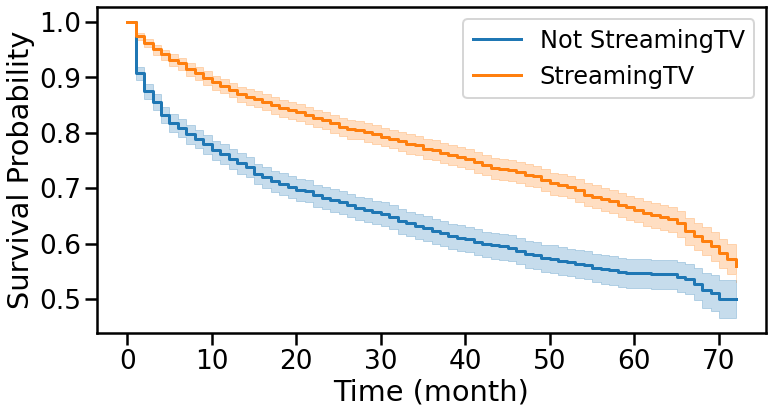

In [14]:
## create a kmf object
kmf = KaplanMeierFitter()

# indexes for cohorts
ix11 = (df_r['StreamingTV']  == 'No')
ix22 = (df_r['StreamingTV']  == 'Yes')

## plot
fig, ax = plt.subplots(1, 1, figsize=(12,6))

## fit the model for 1st cohort
kmf.fit(T[ix11], E[ix11], label='Not StreamingTV')
kmf.plot(ax=ax)

## fit the model for 2nd cohort
kmf.fit(T[ix22], E[ix22], label='StreamingTV')
kmf.plot(ax=ax)

plt.xlabel('Time (month)')
plt.ylabel('Survival Probability')
plt.legend(fontsize = 24);

# Cox Proportional Hazard Model (Survival Regression)

With Cox Regression we can identify relationship between survival probability and predictors. The hazard function (conditional failure rate) is the basis of Cox regression model and gives the instantaneous potential per unit time for the event to occur, given that the individual has survived up to time t. 

Cox regression is a semi parametric model which makes no assumption about shape of hazard function. However, it assumes the hazard ratio (or relative risk) of two groups remains about the same over time. 

\begin{equation*} \underbrace{h(t | x)}_{\text{hazard}} = \overbrace{b_0(t)}^{\text{baseline hazard}} \underbrace{\exp \overbrace{\left(\sum_{i=1}^n b_i (x_i - \overline{x_i})\right)}^{\text{log-partial hazard}}}_ {\text{partial hazard}} \end{equation*} 

## Data processing

In [15]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)

## Clear the column labels
col_name_func(df_dummy)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber_optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
1,0,34,56.95,1889.50,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
4,0,2,70.70,151.65,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
5,0,8,99.65,820.50,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0
6,0,22,89.10,1949.40,0,1,0,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0


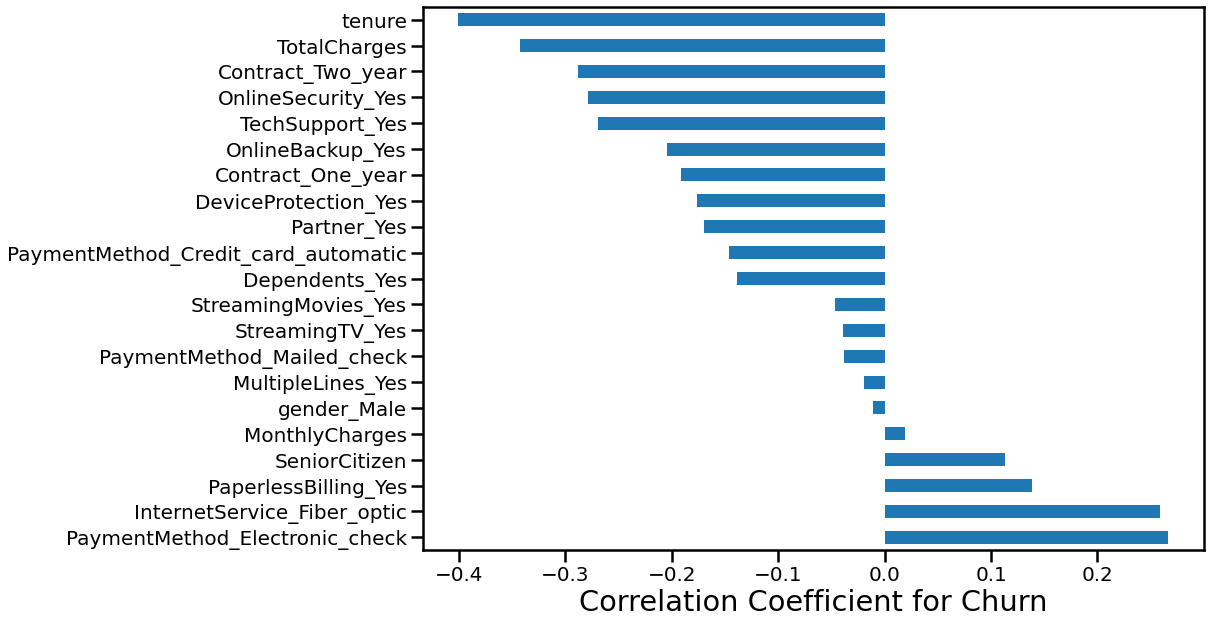

In [16]:
## Investigate the correlation with churn
## Total and Monthly charges are definitely correlated with the service types 
plt.figure(figsize=(14,10))
df_dummy.corr()['Churn'].drop('Churn').sort_values(ascending = False).plot(kind='barh', fontsize=20)
plt.xlabel('Correlation Coefficient for Churn');

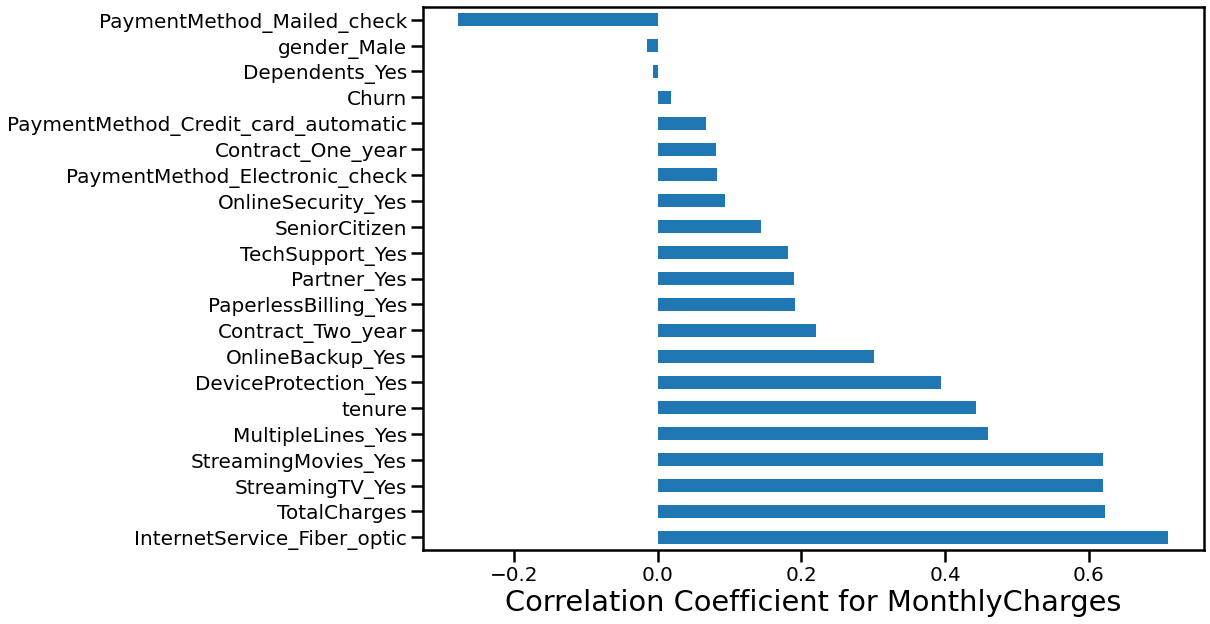

In [17]:
## Total and Monthly charges are definitely correlated with the service types so including them in the model is unnesessary
plt.figure(figsize=(14,10))
df_dummy.corr()['MonthlyCharges'].drop('MonthlyCharges').sort_values(ascending = False).plot(kind='barh', fontsize=20)
plt.xlabel('Correlation Coefficient for MonthlyCharges');

In [18]:
## VIF without TotalCharges = tenure * MonthlyCharges

features = ''
features = "+".join(df_dummy.drop(columns=['Churn', 'TotalCharges']).columns)

# find design matrix for the linear regression model using 'churn' as response variable
yy, XX = dmatrices("Churn ~" + features, data=df_dummy, return_type="dataframe")

# calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["variable"] = XX.columns
vif["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

vif

,variable,VIF
0,Intercept,1561.310621
1,SeniorCitizen,1.124230
2,tenure,3.093472
3,MonthlyCharges,255.578934
4,gender_Male,1.003903
5,Partner_Yes,1.420219
6,Dependents_Yes,1.314397
7,MultipleLines_Yes,6.017541
8,InternetService_Fiber_optic,110.908972
9,OnlineSecurity_Yes,5.760891


In [19]:
# VIF after dropping Monthly Charges: good
features = ''
features = "+".join(df_dummy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns)
yy, XX = dmatrices("Churn ~" + features, data=df_dummy, return_type="dataframe")

# calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["variable"] = XX.columns
vif["VIF"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

vif

,variable,VIF
0,Intercept,14.253231
1,SeniorCitizen,1.124222
2,tenure,3.093427
3,gender_Male,1.003799
4,Partner_Yes,1.419650
5,Dependents_Yes,1.314387
6,MultipleLines_Yes,1.258475
7,InternetService_Fiber_optic,1.393007
8,OnlineSecurity_Yes,1.309785
9,OnlineBackup_Yes,1.239779


In [20]:
## Drop 'MonthlyCharges' and 'TotalCharges' columns
df_dummy.drop(columns =['MonthlyCharges', 'TotalCharges'], inplace=True)

## Building the model

In [21]:
## Instantiate the class to create a Cox Proportional Hazards model object
cph = CoxPHFitter()
cph.fit(
    df_dummy,
    duration_col="tenure",
    event_col="Churn",
#     strata=[
#         "MultipleLines_Yes",
#         "OnlineSecurity_Yes",
#         "TechSupport_Yes",
#         "StreamingTV_Yes",
#         "StreamingMovies_Yes",
#         "Contract_One_year",
#         "Contract_Two_year",
#         "PaymentMethod_Mailed_check",
#     ],
)
cph.print_summary()
# dir(cph)

<lifelines.CoxPHFitter: fitted with 4835 total observations, 3249 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 4835
number of events observed = 1586
   partial log-likelihood = -11337.71
         time fit was run = 2020-11-20 09:49:09 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
SeniorCitizen                        -0.09       0.92       0.06            -0.21             0.03                 0.81                 1.03
gender_Male                          -0.10       0.91       0.05            -0.20             0.00                 0.82                 1.00
Partner_Yes                          -0.56       0.57       0.06            -0.68            -0.45                 0.51                 0.64
Dependents_Yes                        0.01       1.01       0.07            -0.14             0.16                 0.87                 1.17
MultipleLines_Yes                    -0.47       0.62       0.05            -0.58            -0.37                 0.56                 0.69
InternetService_Fiber_optic           0.38       1.46       0.07             0.24             0.53                 1.27                 1.69
OnlineSecurity_Yes                   -0.69       0.50       0.07            -0.83            -0.55                 0.44                 0.58
OnlineBackup_Yes                     -0.69       0.50       0.06            -0.80            -0.58                 0.45                 0.56
DeviceProtection_Yes                 -0.34       0.71       0.06            -0.46            -0.23                 0.63                 0.79
TechSupport_Yes                      -0.41       0.66       0.07            -0.55            -0.28                 0.58                 0.76
StreamingTV_Yes                      -0.03       0.97       0.06            -0.14             0.08                 0.87                 1.09
StreamingMovies_Yes                  -0.15       0.86       0.06            -0.26            -0.03                 0.77                 0.97
Contract_One_year                    -1.48       0.23       0.10            -1.66            -1.29                 0.19                 0.28
Contract_Two_year                    -2.81       0.06       0.18            -3.16            -2.45                 0.04                 0.09
PaperlessBilling_Yes                  0.22       1.24       0.06             0.10             0.34                 1.10                 1.41
PaymentMethod_Credit_card_automatic  -0.04       0.96       0.10            -0.23             0.15                 0.79                 1.16
PaymentMethod_Electronic_check        0.61       1.85       0.08             0.46             0.76                 1.59                 2.15
PaymentMethod_Mailed_check            0.52       1.67       0.10             0.32             0.71                 1.37                 2.04

                                         z      p   -log2(p)
covariate                                                   
SeniorCitizen                        -1.46   0.14       2.80
gender_Male                          -1.91   0.06       4.16
Partner_Yes                          -9.43 <0.005      67.66
Dependents_Yes                        0.11   0.91       0.14
MultipleLines_Yes                    -8.67 <0.005      57.67
InternetService_Fiber_optic           5.18 <0.005      22.07
OnlineSecurity_Yes                   -9.79 <0.005      72.71
OnlineBackup_Yes                    -11.87 <0.005     105.60
DeviceProtection_Yes                 -5.94 <0.005      28.37
TechSupport_Yes                      -5.94 <0.005      28.39
StreamingTV_Yes                      -0.53   0.60       0.75
StreamingMovies_Yes  

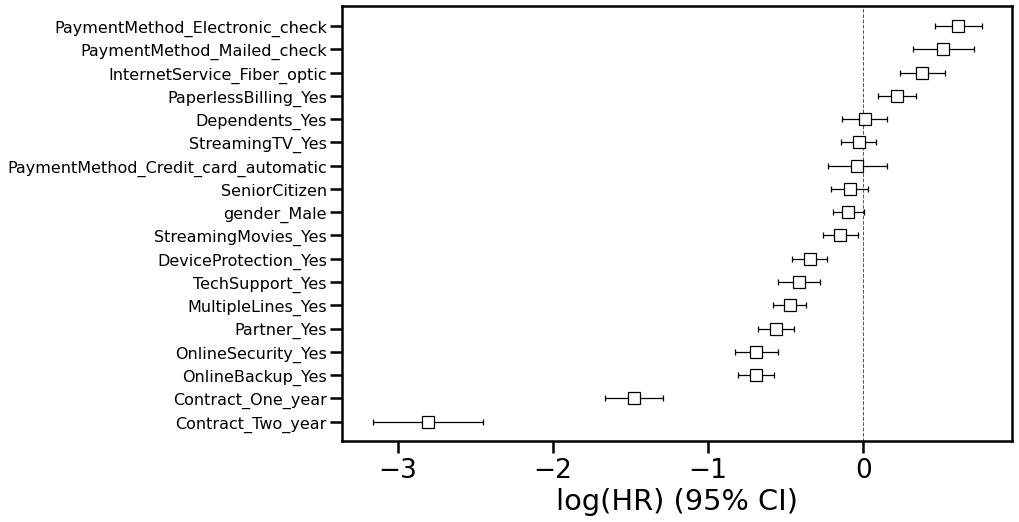

In [22]:
## Plot feature coefficients
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cph.plot(ax=ax)
plt.yticks(fontsize=16);

In [23]:
## Lets see the survival curves at the customer level. I have selected 6 customers (rows 5 till 9).
rows = df_dummy.drop(columns='Churn')[3:8]
rows

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber_optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
5,0,8,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0
6,0,22,1,0,1,1,1,0,1,0,0,1,0,0,0,1,1,0,0
8,0,28,0,1,0,1,1,0,0,1,1,1,1,0,0,1,0,1,0
9,0,62,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
10,0,13,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1


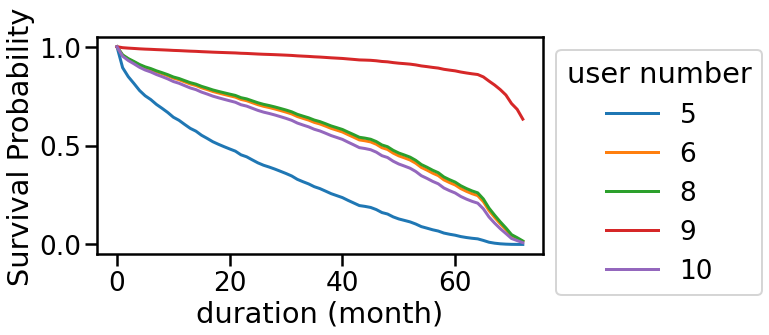

In [24]:
## Lets predict the survival curve for the selected customers. 
fig, ax = plt.subplots(1, 1, figsize=(8,4))
cph.predict_survival_function(rows).plot(ax=ax)
plt.xlabel('duration (month)')
plt.ylabel('Survival Probability')
plt.legend(title = 'user number',bbox_to_anchor=(1, 1));

In [25]:
## Assumptions were not met for all the features, future work!
cph.check_assumptions(df_dummy)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 4835 total observations, 3249 right-censored observations>
         test_name = proportional_hazard_test

---
                                          test_statistic      p  -log2(p)
Contract_One_year                   km             28.95 <0.005     23.68
                                    rank           19.77 <0.005     16.80
Contract_Two_year                   km              6.25   0.01      6.33
                                    rank            1.91   0.17      2.59
Dependents_Yes                      km              0.17   0.68      0.56
                                    rank            0.28   0.59      0.75
DeviceProtection_Yes                km              1.76   0.18      2.43
                                    rank            2.29   0.13      2.94
InternetService_Fiber_optic         km              2.81   0.09      3.42
                                    rank            2.78   0.10      3.39
MultipleLines_Yes                   km             14.59 <0.005     12.87
                                    rank           15.78 <0.005     13.78
OnlineBackup_Yes                    km              4.63   0.03      4.99
                                    rank            4.88   0.03      5.20
OnlineSecurity_Yes                  km             11.63 <0.005     10.59
                                    rank           13.62 <0.005     12.13
PaperlessBilling_Yes                km              0.00   0.99      0.01
                                    rank            0.14   0.71      0.50
Partner_Yes                         km              2.05   0.15      2.71
                                    rank            3.08   0.08      3.66
PaymentMethod_Credit_card_automatic km              0.03   0.86      0.22
                                    rank            0.04   0.84      0.24
PaymentMethod_Electronic_check      km              4.59   0.03      4.96
                                    rank            4.95   0.03      5.26
PaymentMethod_Mailed_check          km              9.19 <0.005      8.68
                                    rank           10.60 <0.005      9.79
SeniorCitizen                       km              0.32   0.57      0.81
                                    rank            0.46   0.50      1.00
StreamingMovies_Yes                 km              9.62 <0.005      9.02
                                    rank           10.39 <0.005      9.62
StreamingTV_Yes                     km             11.42 <0.005     10.43
                                    rank           11.94 <0.005     10.83
TechSupport_Yes                     km             13.25 <0.005     11.84
                                    rank           14.02 <0.005     12.43
gender_Male                         km              1.67   0.20      2.35
                                    rank            1.01   0.32      1.66



1. Variable 'MultipleLines_Yes' failed the non-proportional test: p-value is 0.0001.

   Advice: with so few unique values (only 2), you can include `strata=['MultipleLines_Yes', ...]`
in the call in `.fit`. See documentation in link [E] below.

2. Variable 'OnlineSecurity_Yes' failed the non-proportional test: p-value is 0.0002.

   Advice: with so few unique values (only 2), you can include `strata=['OnlineSecurity_Yes', ...]`
in the call in `.fit`. See documentation in link [E] below.

3. Variable 'TechSupport_Yes' failed the non-proportional test: p-value is 0.0002.

   Advice: with so few unique values (only 2), you can include `strata=['TechSupport_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

4. Variable 'StreamingTV_Yes' failed the non-proportional test: p-value is 0.0005.

   Advice: with so few unique values (only 2), you can include `strata=['StreamingTV_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

5. Variable 'Streami

[]